In [68]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.nn as nn
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os, glob

In [41]:
path = '../DL_with_Pytorch/Chapter3/dogs-vs-cats'
files = glob.glob(os.path.join(path, '*/*.jpg'))

In [42]:
no_of_images = len(files)

In [43]:
shuffle = np.random.permutation(no_of_images)

In [44]:
# os.mkdir(os.path.join(path, 'valid'))

In [45]:
# for t in ['train', 'valid']:
#     for folder in ['dog/', 'cat/']:
#         os.mkdir(os.path.join(path, t, folder))

In [64]:
for i in shuffle[:2000]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'valid', folder, image))

FileNotFoundError: [Errno 2] No such file or directory: '../DL_with_Pytorch/Chapter3/dogs-vs-cats/train/cat.6309.jpg' -> '../DL_with_Pytorch/Chapter3/dogs-vs-cats/valid/cat/cat.6309.jpg'

In [47]:
for i in shuffle[2000:]:
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i], os.path.join(path, 'train', folder, image))

In [51]:
simple_transform = transforms.Compose([
    transforms.Scale((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])
train = ImageFolder(os.path.join(path, 'train'), simple_transform)
valid = ImageFolder(os.path.join(path, 'valid'), simple_transform)

In [55]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [56]:
train.classes

['cat', 'dog']

In [61]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

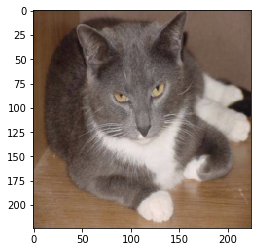

In [62]:
imshow(train[50][0])

In [65]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)

In [70]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

is_cuda = torch.cuda.is_available()
if is_cuda:
    model_ft = model_ft.cuda()

In [72]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [74]:
model_ft.fc = nn.Linear(num_ftrs, 2)